In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms ,datasets
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader,ConcatDataset
from sklearn.model_selection import train_test_split

In [14]:
# !unzip prepared_data.zip

In [15]:
# from google.colab import drive
# drive.mount('/content/drive')


In [16]:
# !unzip /content/drive/MyDrive/COVID-19_Radiography_Dataset.zip

In [17]:
transform = transforms.Compose([
    transforms.Resize((299,299)),  # Resize images to 224x224 pixels
    transforms.ToTensor(),          # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])


In [18]:
train_data = datasets.ImageFolder(root='./prepared_data/train', transform=transform)
test_data = datasets.ImageFolder(root='./prepared_data/test', transform=transform)

In [19]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.1519828].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.4134207].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0322802..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.4134207].
Clippi

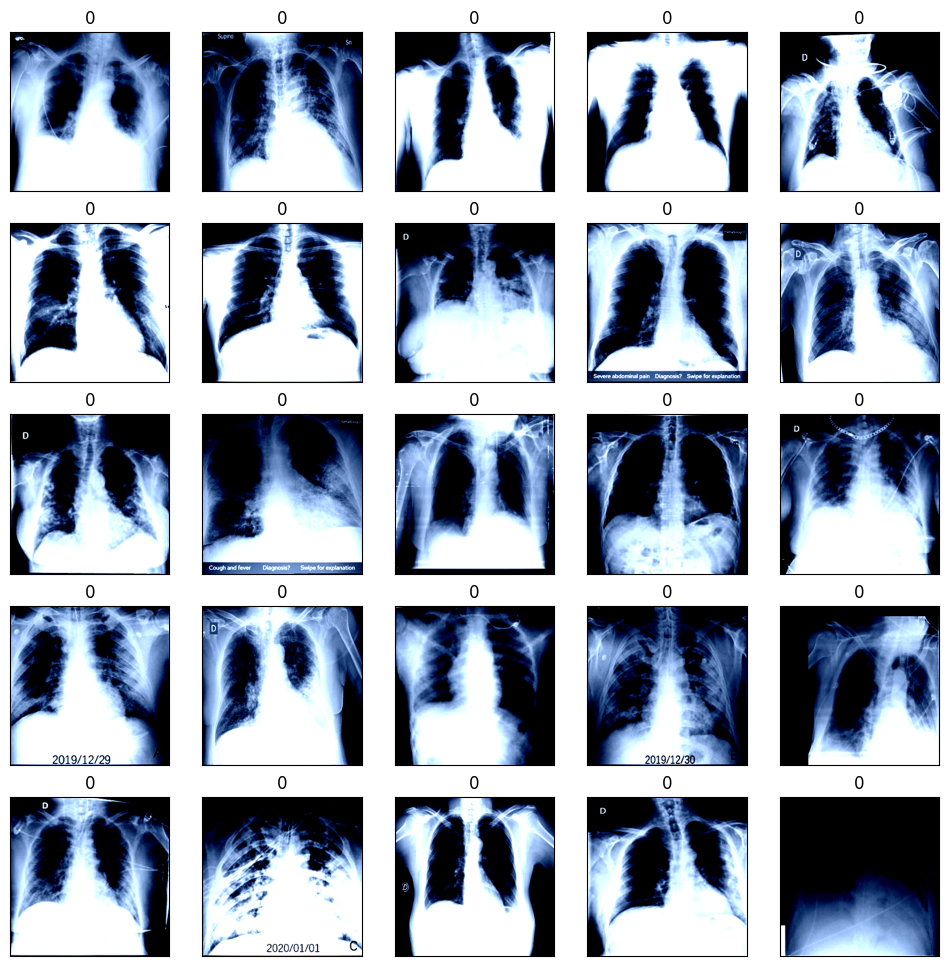

In [20]:
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_data[i][0].permute(1,2,0))
    plt.title(train_data[i][1])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [21]:
class NEURAL_NETWORK(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 149x149
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 74x74
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 37x37
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 18x18
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 9x9
            nn.Flatten(),
            nn.Linear(512 * 9 * 9, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 2),
            nn.Softmax(dim=1),
        )

    def forward(self, x):
        return self.model(x)


In [22]:
def train(model,device,train_loader,optimizer,epoch):
    model.train()
    total_loss=0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = nn.CrossEntropyLoss()(output, target)
        loss.backward()
        optimizer.step()
        total_loss+=loss.item()
    print(f'Epoch {epoch}, Loss: {total_loss / len(train_loader)}')

In [ ]:
model = NEURAL_NETWORK()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
for epoch in range(1,10):
    train(model,device,train_loader,optimizer,epoch)
    print(f'Epoch {epoch} completed')

torch.save(model.state_dict(), 'model.pth')